### Foundations of Data Analytics DS 621
### Final project
### Salsabil Tory
### BSU, Spring 2024

#### Data Ingestion

In [2]:
#load libraries.
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the data
tiktok = pd.read_csv('tiktok_dataset.csv')
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
tiktok.shape

(19382, 12)

In [5]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
# Clean the data
cleaned_data = tiktok.dropna().reset_index(drop=True)
tiktok_data = cleaned_data
tiktok_data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [7]:
tiktok_data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [8]:
tiktok_data = tiktok_data.drop('#', axis=1)


In [9]:
tiktok_data.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


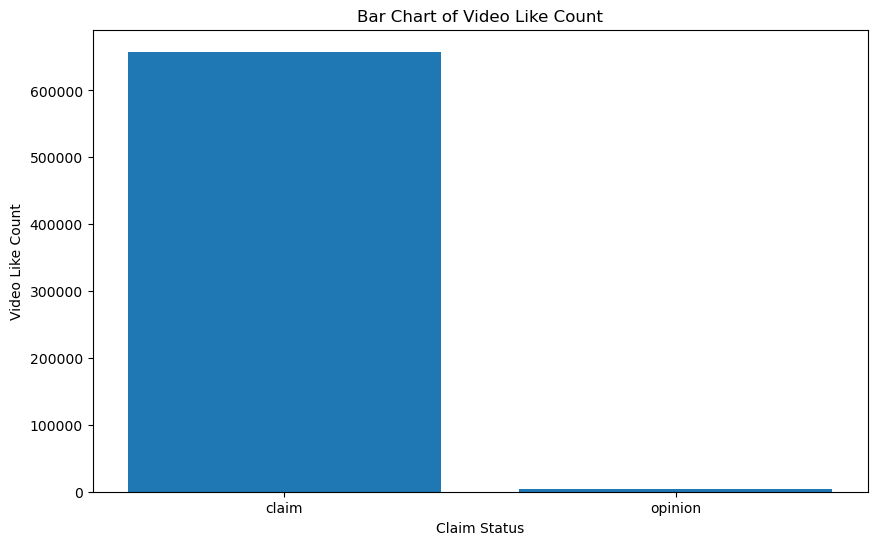

In [10]:
# Bar chart for video_like_count
plt.figure(figsize=(10, 6))
plt.bar(tiktok_data['claim_status'], tiktok_data['video_like_count'])
plt.title('Bar Chart of Video Like Count')
plt.xlabel('Claim Status')
plt.ylabel('Video Like Count')
plt.show()

Numeric columns:
Index(['video_id', 'video_duration_sec', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')


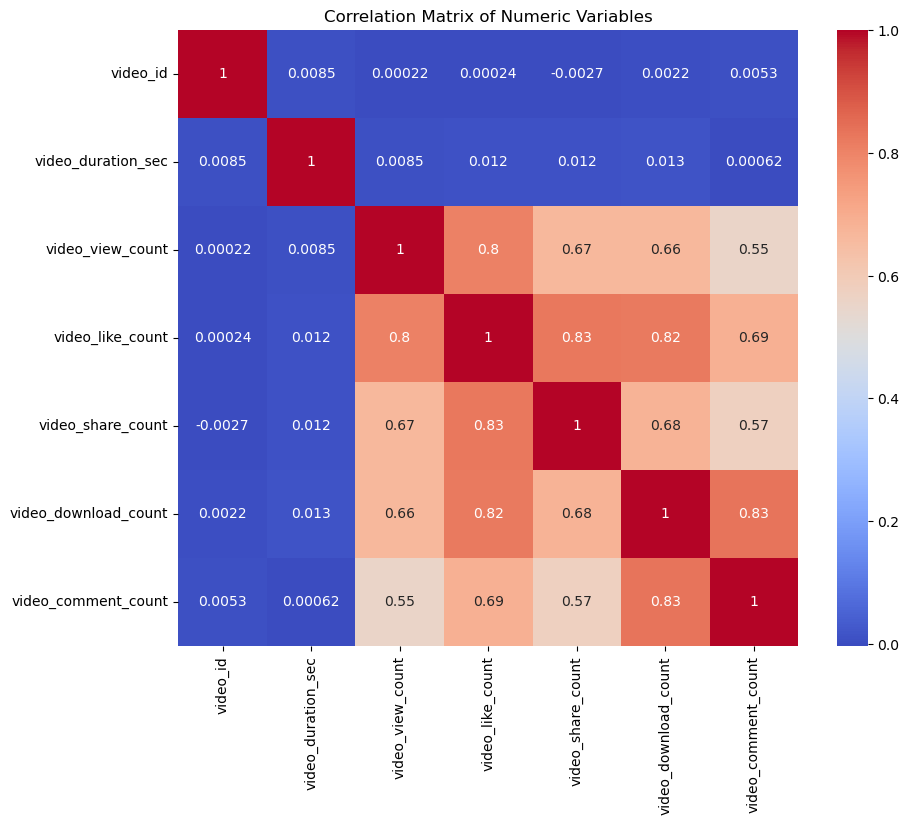

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df = tiktok_data 
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric columns:")
print(numeric_cols)

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In this code:

We first import the necessary libraries, load the tiktok.csv dataset into a pandas DataFrame, select the numeric columns in the DataFrame using the select_dtypes method, compute the correlation matrix of these numeric columns using the corr method.
Finally, we use seaborn’s heatmap function to plot the correlation matrix.
The heatmap plot shows the correlation between all numeric variables in your dataset. The color in the heatmap shows how much two variables are correlated: a value close to 1 or -1 means a strong positive or negative correlation, respectively. A value close to 0 means no correlation.

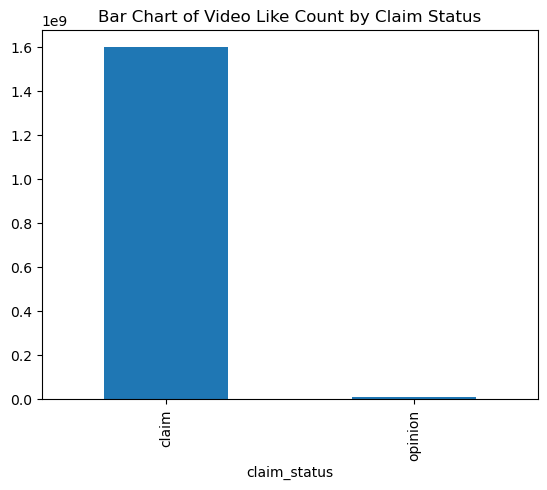

In [12]:
# bar chart of 'video_like_count' by 'claim_status' 
df.groupby('claim_status')['video_like_count'].sum().plot(kind='bar')
plt.title('Bar Chart of Video Like Count by Claim Status')
plt.show()


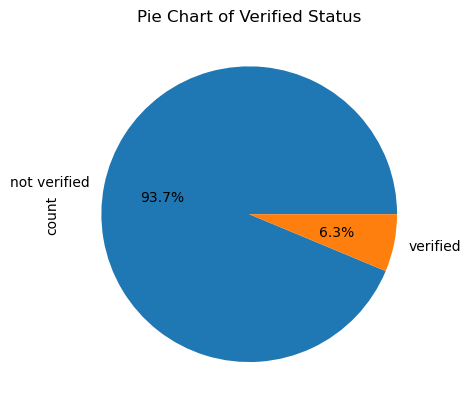

In [13]:
# Pie Chart of Verified Status
df['verified_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Verified Status')
plt.show()


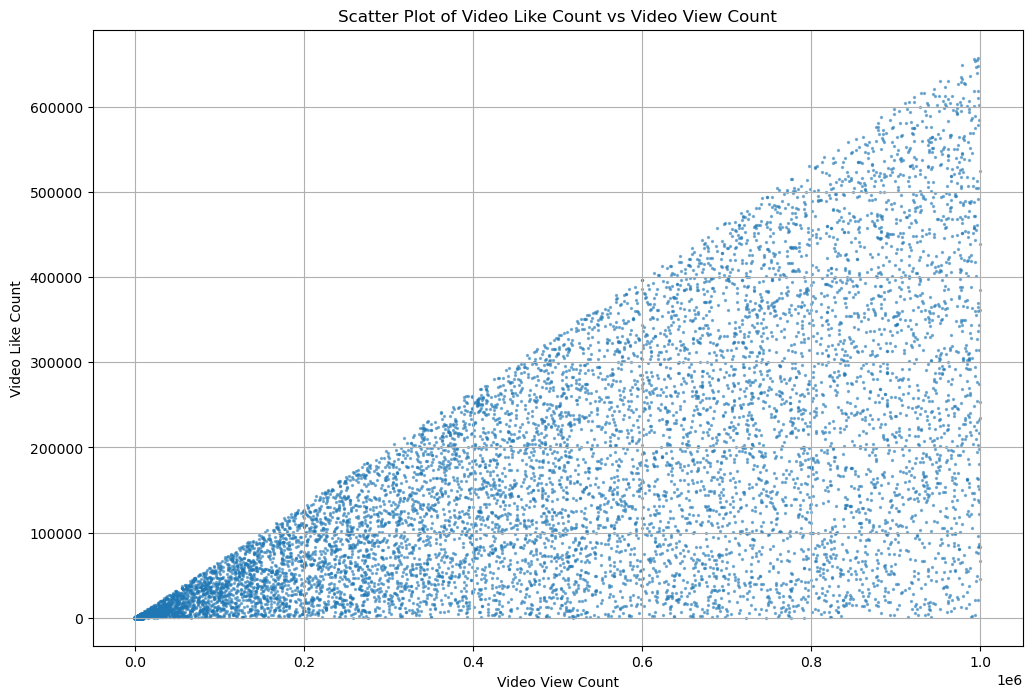

In [14]:
# scatter plot of 'video_view_count' vs 'video_like_count' 
plt.figure(figsize=(12,8))
plt.scatter(df['video_view_count'], df['video_like_count'], s=2, alpha=0.5)
plt.title('Scatter Plot of Video Like Count vs Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.grid(True)

plt.show()


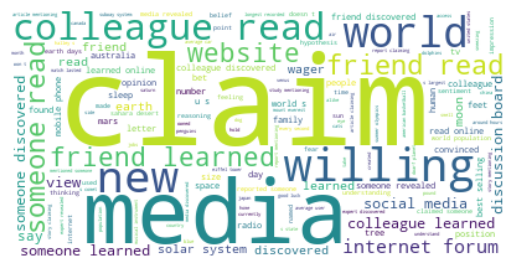

In [15]:
from wordcloud import WordCloud

#wordcloud of 'video_transcription_text' 
text = ' '.join(review for review in df['video_transcription_text'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


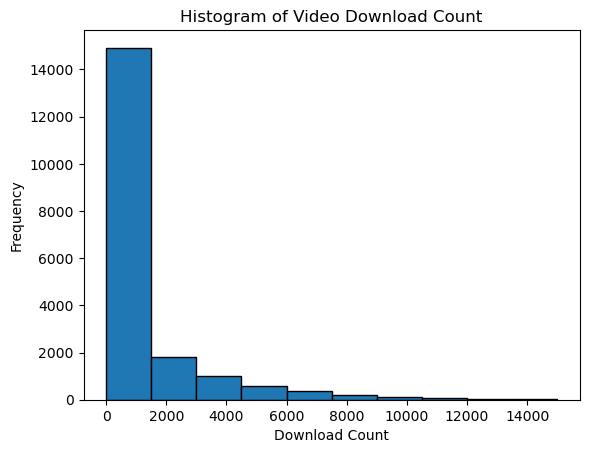

In [16]:
import matplotlib.pyplot as plt

# Histogram of Video Download Count
plt.hist(df['video_download_count'], bins=10, edgecolor='black')
plt.title('Histogram of Video Download Count')
plt.xlabel('Download Count')
plt.ylabel('Frequency')
plt.show()


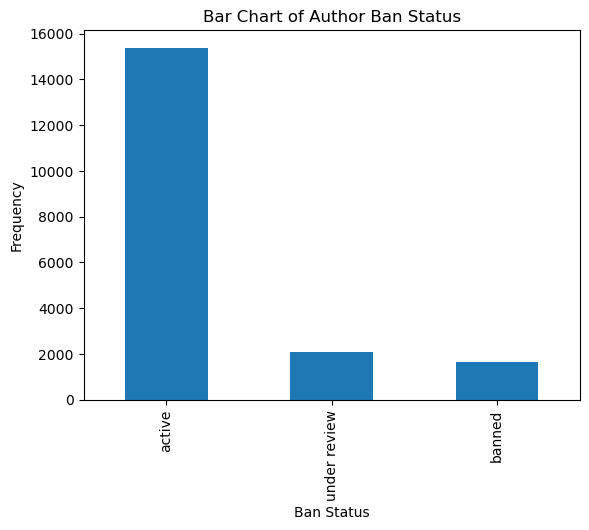

In [45]:
df['author_ban_status'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Author Ban Status')
plt.xlabel('Ban Status')
plt.ylabel('Frequency')
plt.show()


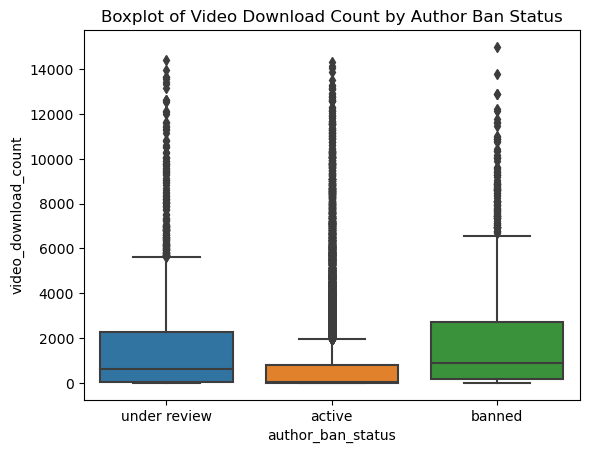

In [46]:
import seaborn as sns

sns.boxplot(x='author_ban_status', y='video_download_count', data=df)
plt.title('Boxplot of Video Download Count by Author Ban Status')
plt.show()


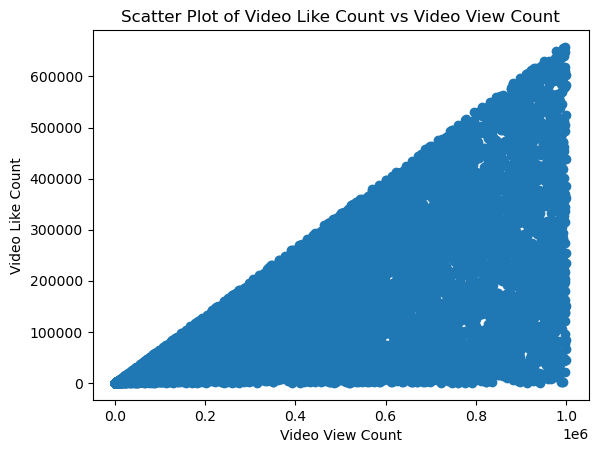

In [47]:
import matplotlib.pyplot as plt

plt.scatter(df['video_view_count'], df['video_like_count'])
plt.title('Scatter Plot of Video Like Count vs Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.show()


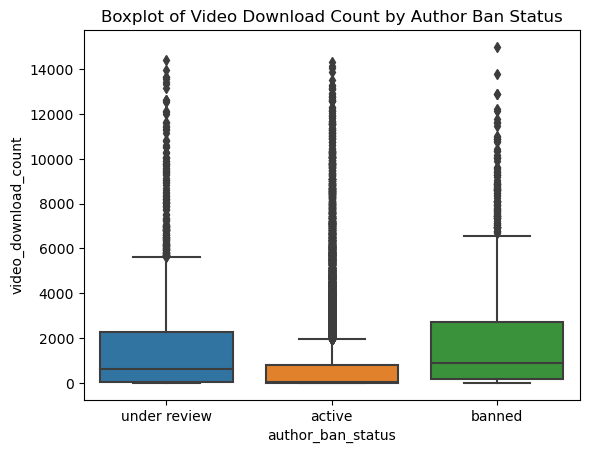

In [48]:
import seaborn as sns

sns.boxplot(x='author_ban_status', y='video_download_count', data=df)
plt.title('Boxplot of Video Download Count by Author Ban Status')
plt.show()


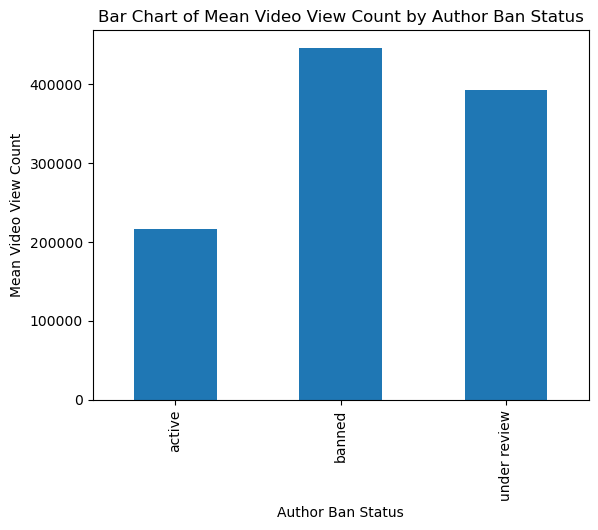

In [49]:
df.groupby('author_ban_status')['video_view_count'].mean().plot(kind='bar')
plt.title('Bar Chart of Mean Video View Count by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Mean Video View Count')
plt.show()


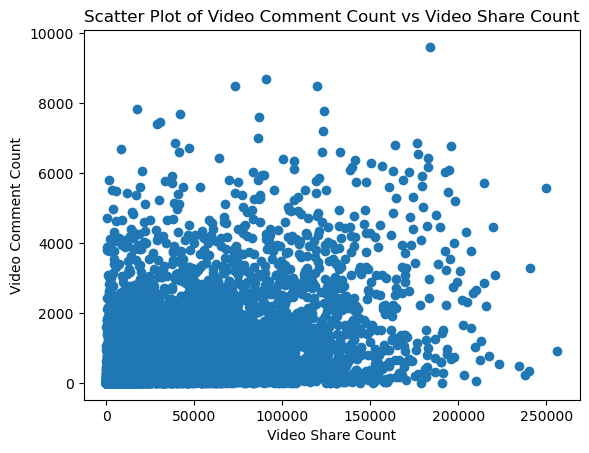

In [50]:
plt.scatter(df['video_share_count'], df['video_comment_count'])
plt.title('Scatter Plot of Video Comment Count vs Video Share Count')
plt.xlabel('Video Share Count')
plt.ylabel('Video Comment Count')
plt.show()


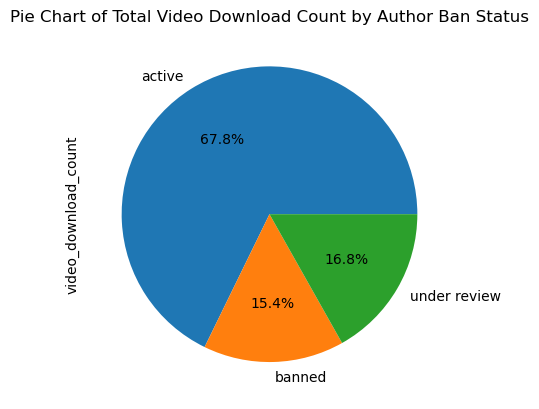

In [51]:
df.groupby('author_ban_status')['video_download_count'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Total Video Download Count by Author Ban Status')
plt.show()


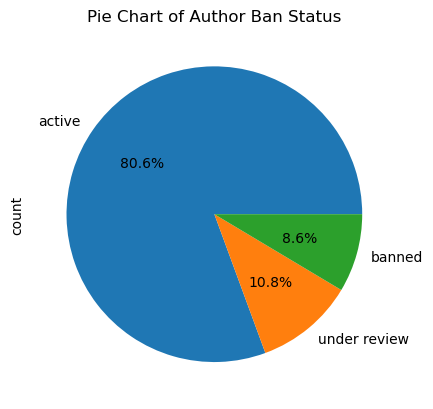

In [52]:
import matplotlib.pyplot as plt

# pie chart of Author ban Status
df['author_ban_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Author Ban Status')
plt.show()


## Data Engineering
### EDA and Calculations

In [53]:
# Investigate the class balance for the `claim_status` variable
df["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [54]:
# Determine the average view counts of videos with a "claim" status
claims =df[df["claim_status"] == "claim"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % claims["video_view_count"].mean())
print("Median:", claims["video_view_count"].median())

Mean: 501029.45
Median: 501555.0


In [55]:
# Determine the average view counts of videos with an "opinion" status
opinions = df[df["claim_status"] == "opinion"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % opinions["video_view_count"].mean())
print("Median:", opinions["video_view_count"].median())

Mean: 4956.43
Median: 4953.0


In [57]:
# Determine counts for each group combination of `claim_status` 
# and `author_ban_status`
df.groupby(["claim_status", "author_ban_status"]).count()

video_id  video_duration_sec  \
claim_status author_ban_status                                 
claim        active                 6566                6566   
             banned                 1439                1439   
             under review           1603                1603   
opinion      active                 8817                8817   
             banned                  196                 196   
             under review            463                 463   

                                video_transcription_text  verified_status  \
claim_status author_ban_status                                              
claim        active                                 6566             6566   
             banned                                 1439             1439   
             under review                           1603             1603   
opinion      active                                 8817             8817   
             banned                                  196              196   
             under review                            463              463   

                                video_view_count  video_like_count  \
claim_status author_ban_status                                       
claim        active                         6566              6566   
             banned                         1439              1439   
             under review                   1603              1603   
opinion      active                         8817              8817   
             banned                          196               196   
             under review                    463               463   

                                video_share_count  video_download_count  \
claim_status author_ban_status                                            
claim        active                          6566                  6566   
             banned                          1439                  1439   
             under review                    1603                  1603   
opinion      active                          8817                  8817   
             banned                           196                   196   
             under review                     463                   463   

                                video_comment_count  
claim_status author_ban_status                       
claim        active                            6566  
             banned                            1439  
             under review                      1603  
opinion      active                            8817  
             banned                             196  
             under review                       463

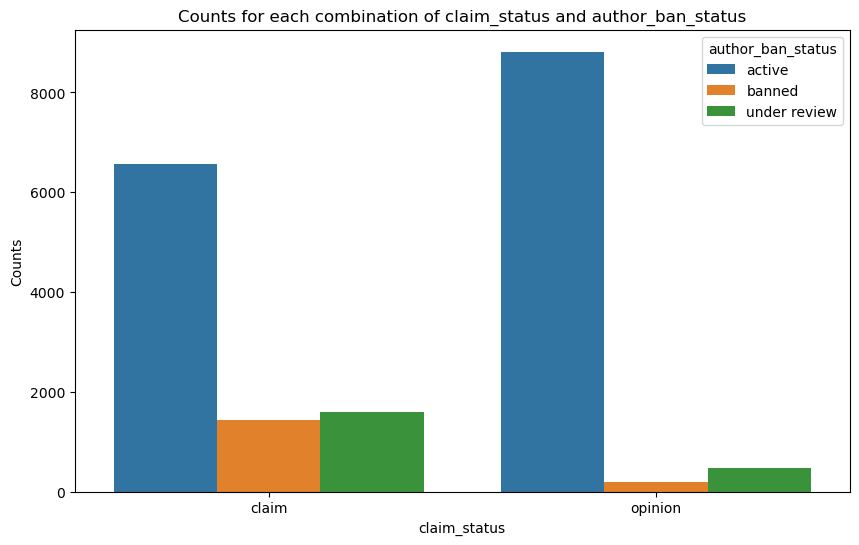

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'claim_status' and 'author_ban_status' and get counts
grouped_counts = df.groupby(["claim_status", "author_ban_status"]).size().reset_index(name='counts')
# seaborn to create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="claim_status", y="counts", hue="author_ban_status", data=grouped_counts)
plt.ylabel('Counts')
plt.title('Counts for each combination of claim_status and author_ban_status')
plt.show()


In [59]:
# Calculate the median video share count of `author_ban_status`
df.groupby("author_ban_status")["video_share_count"].median()

author_ban_status
active            437.0
banned          14468.0
under review     9444.0
Name: video_share_count, dtype: float64

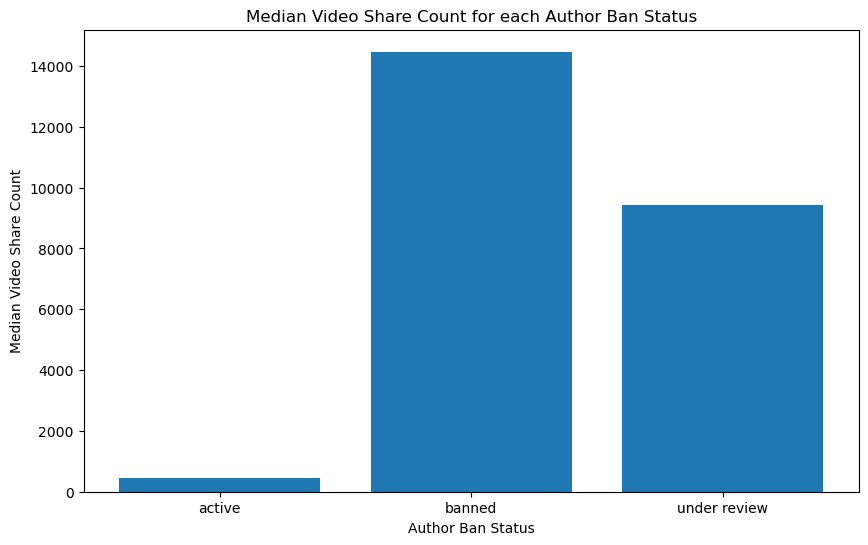

In [60]:
import matplotlib.pyplot as plt

# Calculate the median video share count of 'author_ban_status'
median_counts = df.groupby("author_ban_status")["video_share_count"].median().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(median_counts['author_ban_status'], median_counts['video_share_count'])
plt.xlabel('Author Ban Status')
plt.ylabel('Median Video Share Count')
plt.title('Median Video Share Count for each Author Ban Status')
plt.show()


In [61]:
# Calculate the count, mean, and median of engagement columns
# grouped by `author_ban_status`
df.groupby(["author_ban_status"]).agg({"video_view_count" : ["count", "mean", "median"],
                                         "video_like_count": ["mean", "median"],
                                         "video_share_count": ["mean", "median"]})

video_view_count                          video_like_count  \
                             count           mean    median             mean   
author_ban_status                                                              
active                       15383  215927.039524    8616.0     71036.533836   
banned                        1635  445845.439144  448201.0    153017.236697   
under review                  2066  392204.836399  365245.5    128718.050339   

                            video_share_count           
                     median              mean   median  
author_ban_status                                       
active               2222.0      14111.466164    437.0  
banned             105573.0      29998.942508  14468.0  
under review        71204.5      25774.696999   9444.0

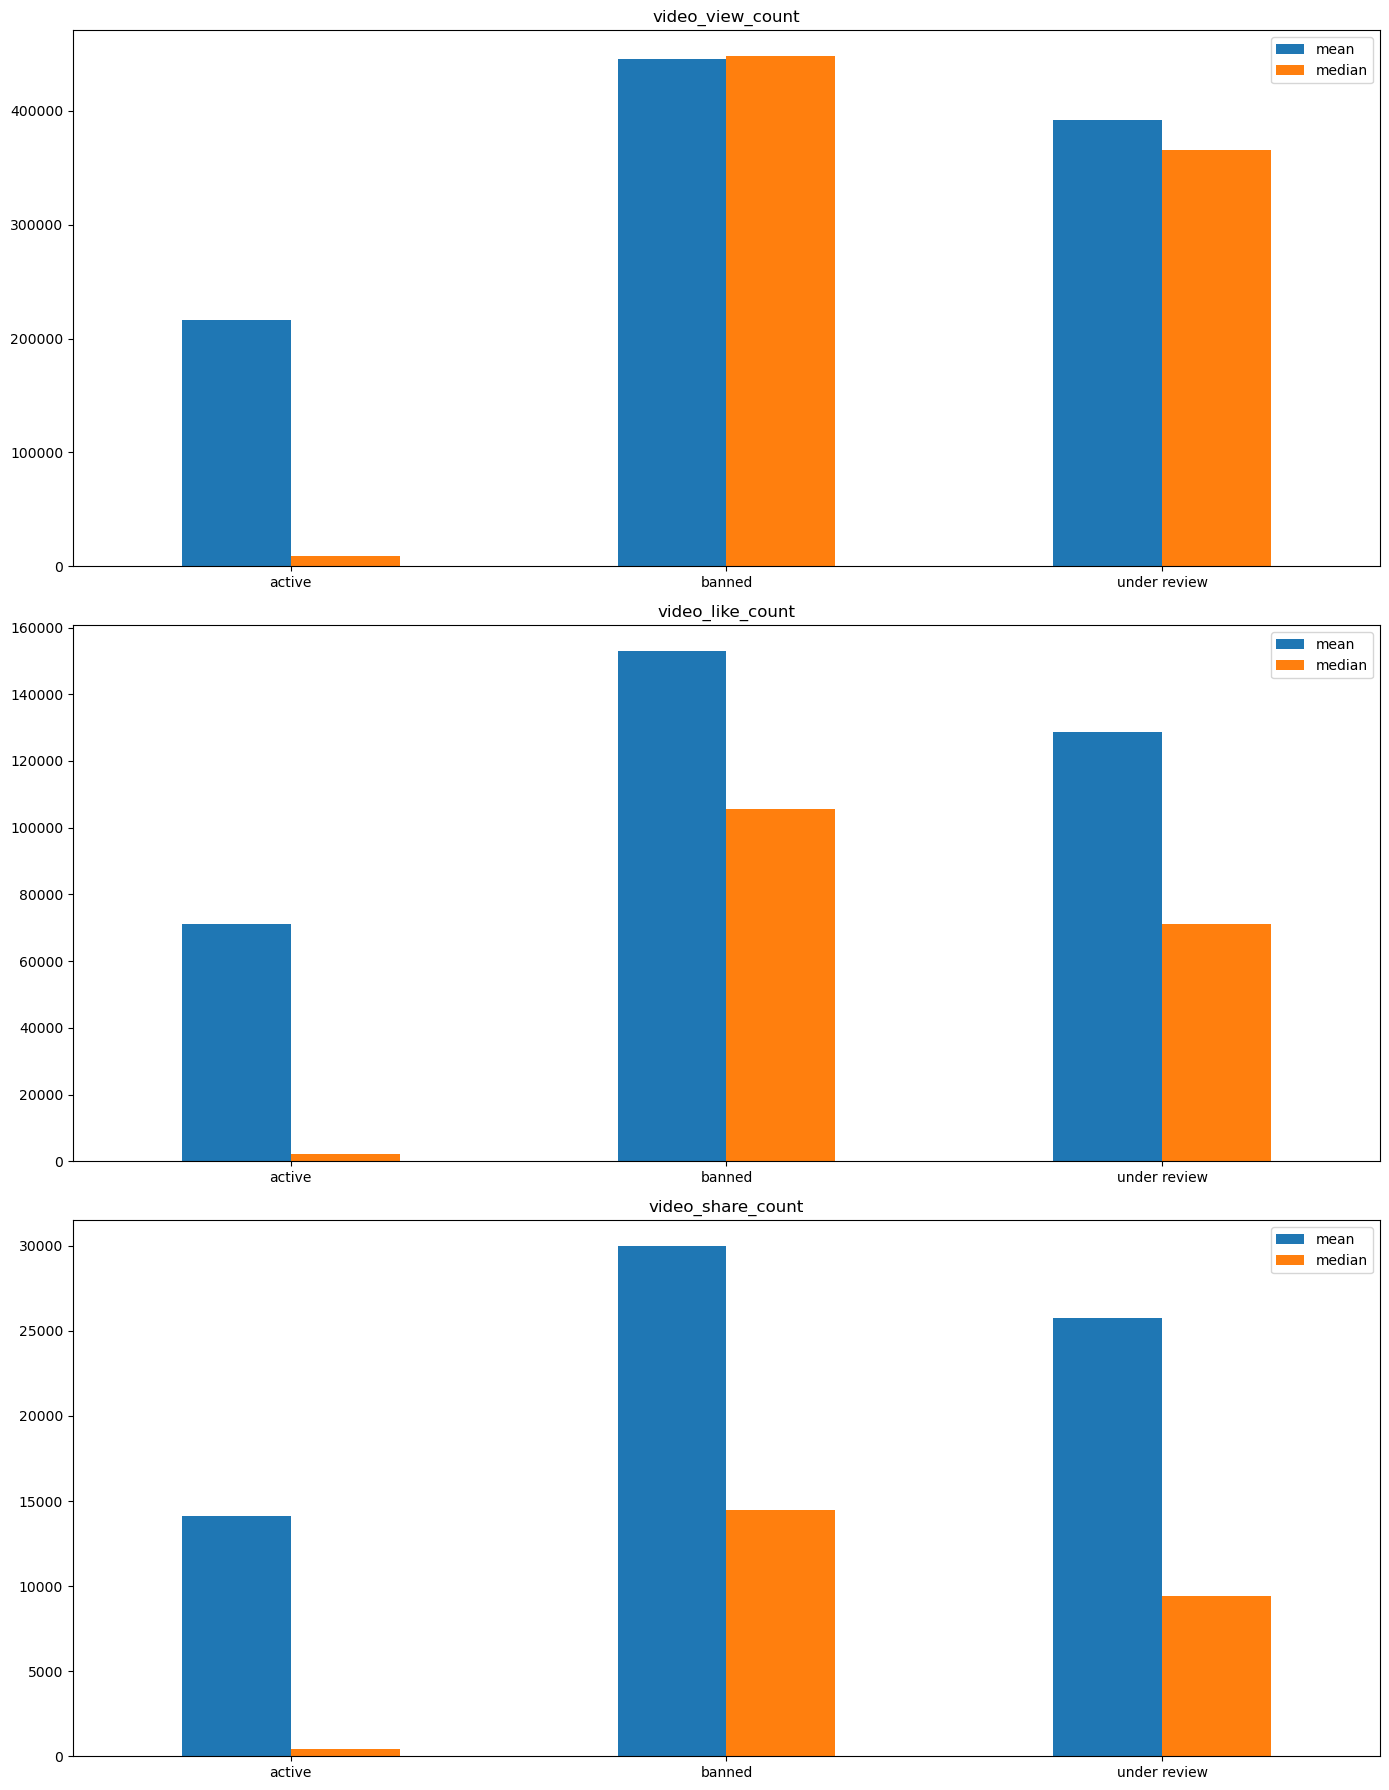

In [62]:
import matplotlib.pyplot as plt

# Calculate the count, mean, and median of engagement columns grouped by `author_ban_status`
grouped_df = df.groupby(["author_ban_status"]).agg({"video_view_count" : ["count", "mean", "median"],
                                                    "video_like_count": ["mean", "median"],
                                                    "video_share_count": ["mean", "median"]}).reset_index()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
# video_view_count
grouped_df['video_view_count'][['mean', 'median']].plot(kind='bar', ax=axes[0], title='video_view_count')  # Change here
axes[0].set_xticklabels(grouped_df['author_ban_status'], rotation=0)  # Change here

# video_like_count
grouped_df['video_like_count'][['mean', 'median']].plot(kind='bar', ax=axes[1], title='video_like_count')  # Change here
axes[1].set_xticklabels(grouped_df['author_ban_status'], rotation=0)  # Change here

# video_share_count
grouped_df['video_share_count'][['mean', 'median']].plot(kind='bar', ax=axes[2], title='video_share_count')  # Change here
axes[2].set_xticklabels(grouped_df['author_ban_status'], rotation=0)  

plt.tight_layout()
plt.show()


In this graph, we can see the mean and median values of video view count, video like count, and video share count vary with author ban status. The bar plots provide a visual representation of these relationships. It is apparent videos from banned authors or those under review tend to have higher engagement (views, likes, shares) compared to videos from active authors

In [63]:
# Feature extraction exercise
# Create new columns to better understand engagement rates:
# `likes_per_view`, `comments_per_view`, and `shares_per_view`

data_eng = df.copy()

data_eng["likes_per_view"] = df["video_like_count"] / df["video_view_count"]
data_eng["comments_per_view"] = df["video_comment_count"] / df["video_view_count"]
data_eng["shares_per_view"] = df["video_share_count"] / df["video_view_count"]

# Compile information to calculate the count, mean, and median
# grouped by `claim_status` and `author_ban_status`
data_eng.groupby(["claim_status", "author_ban_status"]).agg({"likes_per_view" : ["count", "mean", "median"],
                                                            "comments_per_view": ["mean", "median"],
                                                            "shares_per_view": ["mean", "median"]})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view           shares_per_view  \
                                            mean    median            mean   
claim_status author_ban_status                                               
claim        active                     0.001393  0.000776        0.065456   
             banned                     0.001377  0.000746        0.067893   
             under review               0.001367  0.000789        0.065733   
opinion      active                     0.000517  0.000252        0.043729   
             banned                     0.000434  0.000193        0.040531   
             under review               0.000536  0.000293        0.044472   

                                          
                                  median  
claim_status author_ban_status            
claim        active             0.049279  
             banned             0.051606  
             under review       0.049967  
opinion      active             0.032405  
             banned             0.030728  
             under review       0.035027

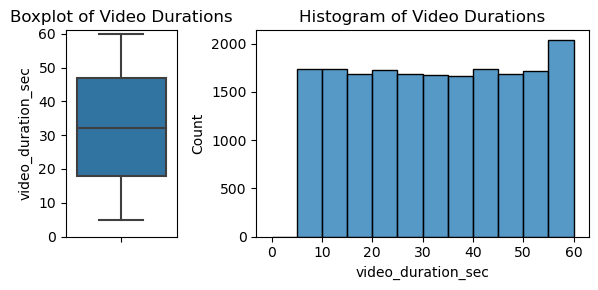

In [64]:
# Create a boxplot and histogram to visualize the distribution of `video_duration_sec`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_duration_sec",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Durations")
ax[0].set_ylim(0, 61)

sns.histplot(data = df,
             x = "video_duration_sec",
             bins = range(0, 61, 5),
             ax = ax[1])
ax[1].set_title("Histogram of Video Durations")

fig.tight_layout()
plt.show()

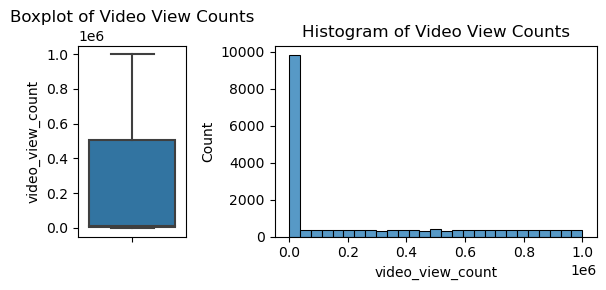

In [65]:
# Create a boxplot and histogram to visualize the distribution of `video_view_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_view_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video View Counts")

sns.histplot(data = df,
             x = "video_view_count",
             ax = ax[1])
ax[1].set_title("Histogram of Video View Counts")

fig.tight_layout()
plt.show()

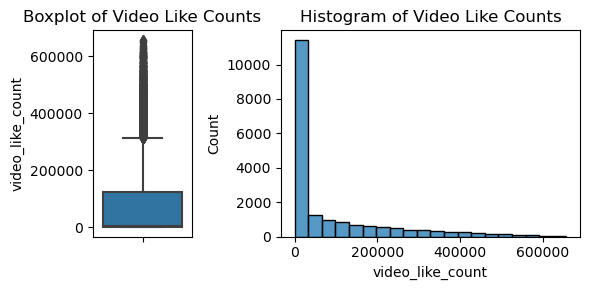

In [66]:
# Create a boxplot and histogram to visualize the distribution of `video_like_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_like_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Like Counts")

sns.histplot(data = df,
             x = "video_like_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Like Counts")

fig.tight_layout()
plt.show()


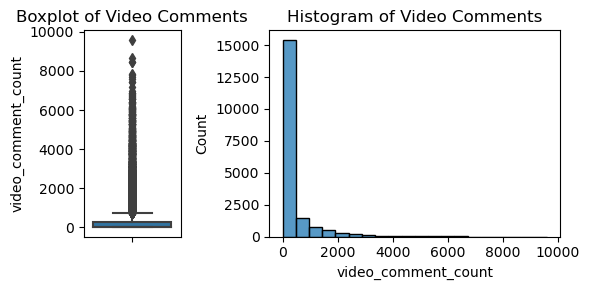

In [67]:
fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_comment_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Comments")

sns.histplot(data = df,
             x = "video_comment_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Comments")

fig.tight_layout()
plt.show()

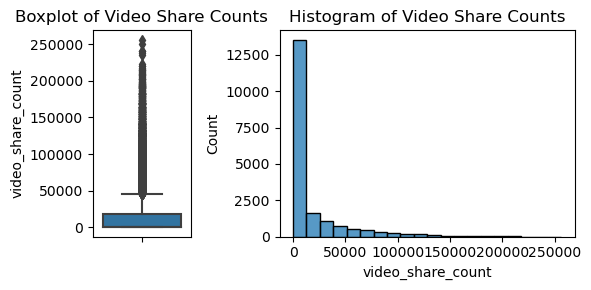

In [68]:
# Create a boxplot and histogram to visualize the distribution of `video_share_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_share_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Share Counts")

sns.histplot(data = df,
             x = "video_share_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Share Counts")

fig.tight_layout()
plt.show()


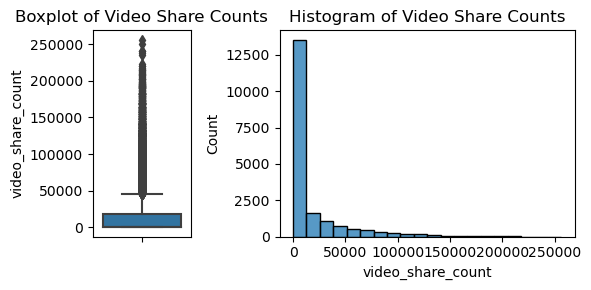

In [71]:
# Create a boxplot and histogram to visualize the distribution of `video_share_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_share_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Share Counts")

sns.histplot(data = df,
             x = "video_share_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Share Counts")

fig.tight_layout()
plt.show()

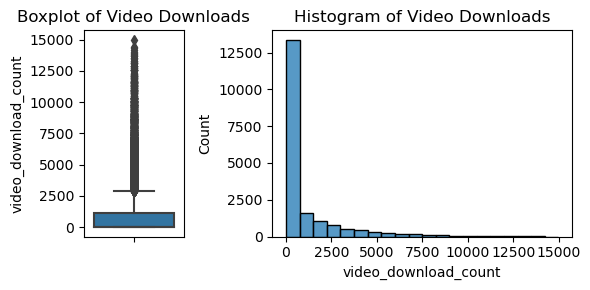

In [72]:
# Create a boxplot and histogram to visualize the distribution of `video_download_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = df,
            y = "video_download_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Downloads")

sns.histplot(data = df,
             x = "video_download_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Downloads")

fig.tight_layout()
plt.show()

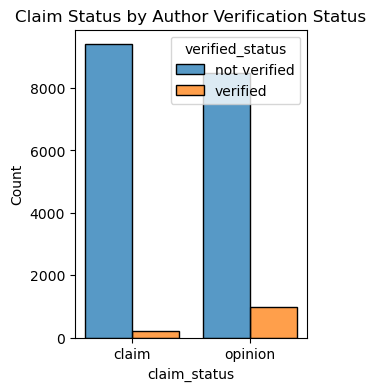

In [73]:
# Create a histogram of `claim_status` by `verification_status`
plt.figure(figsize = (3, 4))
sns.histplot(data = df,
             x = "claim_status",
             hue = "verified_status",
             multiple = "dodge",
             shrink = 0.8)
plt.title("Claim Status by Author Verification Status")
plt.show()

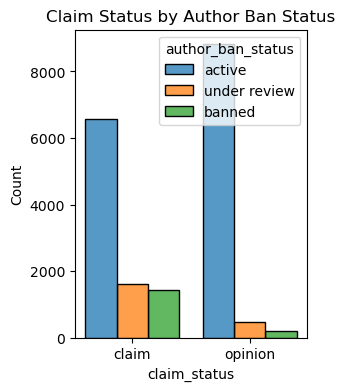

In [74]:
# Create a histogram of `claim_status` by `author_ban_status`
plt.figure(figsize = (3, 4))
sns.histplot(data = df,
             x = "claim_status",
             hue = "author_ban_status",
             hue_order = ["active", "under review", "banned"],
             multiple = "dodge",
             shrink = 0.8)
plt.title("Claim Status by Author Ban Status")
plt.show()

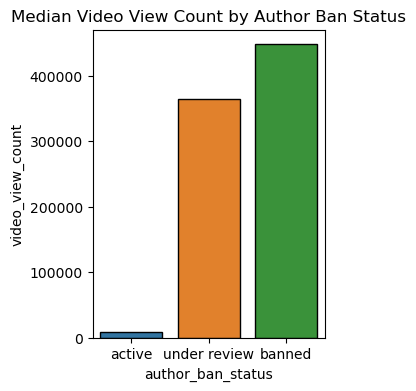

In [75]:
# Create a bar plot of median view counts by ban status
plt.figure(figsize = (3, 4))
sns.barplot(data = df,
            x = "author_ban_status",
            y = "video_view_count",
            order = ["active", "under review", "banned"],
            estimator = "median",
            errorbar = None,
            edgecolor = "black")
plt.title("Median Video View Count by Author Ban Status")
plt.show()

In [76]:
# Calculate the median view count for claim status.
df.groupby("claim_status")["video_view_count"].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

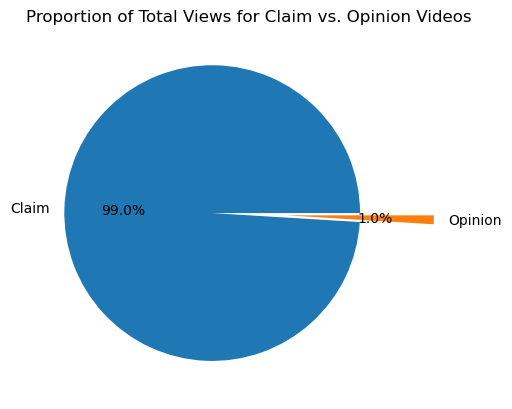

In [77]:
# Create a pie graph depicting the proportions of total views
# by `claim_status`
plt.pie(x = df.groupby("claim_status")["video_view_count"].sum(),
        explode = [0.25, 0.25],
        labels = ["Claim", "Opinion"],
        autopct = "%1.1f%%")
plt.title("Proportion of Total Views for Claim vs. Opinion Videos")
plt.show()

In [78]:
#finiding outliers
cols = ["video_view_count", "video_like_count", "video_share_count",
       "video_download_count", "video_comment_count"]

for col in cols:
    
    percentile_25 = df[col].quantile(0.25)  # 25th percentile
    percentile_75 = df[col].quantile(0.75)  # 75th percentile
    iqr = percentile_75 - percentile_25  # calculate IQR
    
    col_med = df[col].median()  # median of column
    
    threshold = col_med + (1.5 * iqr)  # outlier threshold (upper only)
    
    count_sum = (df[col] > threshold).sum()  # mask + sum Boolean mask
    
    print("Number of outliers in", col, ":", count_sum)

Number of outliers in video_view_count : 2343
Number of outliers in video_like_count : 3468
Number of outliers in video_share_count : 3732
Number of outliers in video_download_count : 3733
Number of outliers in video_comment_count : 3882


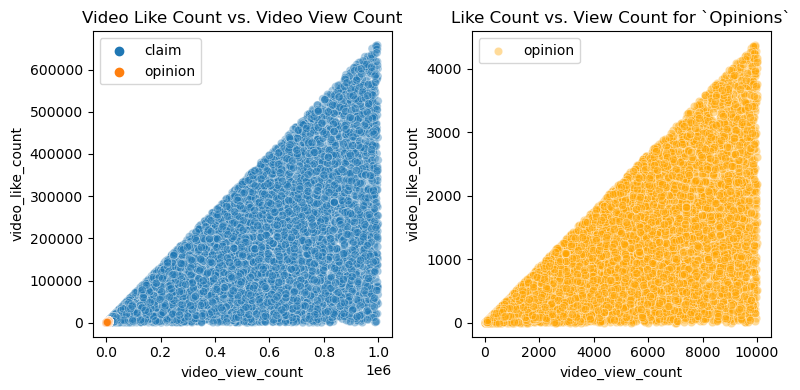

In [79]:
# Create a scatterplot of `video_view_count` vs `video_like_count` 
# according to 'claim_status'

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

sns.scatterplot(data = df,
                x = "video_view_count",
                y = "video_like_count",
                hue = "claim_status",
                alpha = 0.4,
                ax = ax[0])
ax[0].legend()
ax[0].set_title("Video Like Count vs. Video View Count")

sns.scatterplot(data = df[df["claim_status"] == "opinion"],
                x = "video_view_count",
                y = "video_like_count",
                c = "orange",
                alpha = 0.4,
                ax = ax[1])
ax[1].legend(labels = ["opinion"])
ax[1].set_title("Like Count vs. View Count for `Opinions`")

plt.tight_layout()
plt.show()

### Statistical Analysis:
The goal of this part of the project is to find whether there’s a significant difference in the view counts of TikTok videos posted by verified accounts compared to those posted by unverified accounts.
Consequently, we propose the following null and alternative hypotheses:
Null Hypothesis (H0): There is no significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts.
Alternative Hypothesis (Ha): There is a significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts.


In [80]:
# Import packages for statistical analysis/hypothesis testing
from scipy import stats
# Determine how many rows are missing data
df.isnull().sum()

claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [17]:
# Drop rows with missing values and save as a new dataframe

print("Number of entries prior to cleaning:", df.shape[0])
data_cleaned = df.dropna(axis = 0)
print("Number of entries removed after cleaning:", df.shape[0] - data_cleaned.shape[0])

Number of entries prior to cleaning: 19084
Number of entries removed after cleaning: 0


## Hypothesis Testing

State the null and alternative hypotheses,
Choose a significance level,
Calculate the p-value,
Reject or fail to reject the null hypothesis

In [82]:
# Compute the mean `video_view_count` for each group in `verified_status`
data_cleaned.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [83]:
# Conduct a two-sample t-test to compare means

# Subset data accordingly using Boolean masks
data_cleaned_verified = data_cleaned[data_cleaned["verified_status"] == "verified"]
data_cleaned_unverified = data_cleaned[data_cleaned["verified_status"] == "not verified"]

# Conduct the hypothesis testing to calculate the p-value
tstat, pvalue = stats.ttest_ind(
    a = data_cleaned_verified["video_view_count"],
    b = data_cleaned_unverified["video_view_count"],
    equal_var = False)

print("t-statistic:", tstat)
print("p-value:", pvalue)

t-statistic: -25.499441780633777
p-value: 2.6088823687177823e-120
